In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from scipy.interpolate import spline
# jupyter nbconvert xxx.ipynb --no-input

In [2]:
Laf = 3 # um
r = 0.95 # um (active ratio)
md = 2000 # um^-2
ka = 40 # sec^-1
k = 300 # pN/um
Fd = 9.2 # pN
v = 4 # um/s
w1 = Fd/k # 0.02 # um # 2w
w2 = 0.02

In [3]:
s = pd.read_csv('dataDt1s5/v11Nspd_std273s5.csv', names=['spd','std']) # NB: speed for R1.0 was calculated from TS=200 due to a previous brief detach
s2 = pd.read_csv('dataDt1s5/v11Nspd_std273s5b2.csv', names=['spd','std'])
ac_def=pd.read_csv('dataDt1s5/v11Nmtrs_std273s5.csv', names=['spec1','dev1','spec2','dev2'])
ac_def2=pd.read_csv('dataDt1s5/v11Nmtrs_std273s5b2.csv', names=['spec1','dev1','spec2','dev2'])
r = np.array([0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0])

$Defective\ Binding\ Motors\ Estimate_1 = \frac{Fd}{(Fd)+(kV/ka)} \times (1-R) \times md \times Laf \times 2(Fd/k)$ 

$Defective\ Binding\ Motors\ Estimate_2 = \frac{Fd}{(Fd)+(kV/ka)} \times (1-R) \times md \times Laf \times 2(w)$ 

In [4]:
bm_es_def_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_def = []
bm_es_def_2 = []
bm_es_def2 = []
ratio = [0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0]

for i in range(8): # i -- motor ratio
    bm_def=(Fd / (Fd+((k*(s['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w1
    bm_def2=(Fd / (Fd+((k*(s['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w2
    bm_es_def_.append(bm_def)
    bm_es_def_2.append(bm_def2)
bm_es_def.append(bm_es_def_)
bm_es_def2.append(bm_es_def_2)
bm_es_def_ = []; bm_es_def_2 = []

dfw1 = np.array(bm_es_def); dfw1 = dfw1.flatten()
dfw2 = np.array(bm_es_def2); dfw2 = dfw2.flatten()

In [5]:
len(dfw2)

8

In [6]:
dfw1

array([103.36309834,  70.28987268,  26.99466571,  14.90134045,
         6.27309246,   3.23509924,   1.1930037 ,   0.        ])

In [7]:
bm_es_act_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_act = []
bm_es_act_2 = []
bm_es_act2 = []
ratio = [0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0]

for i in range(8): # i -- motor ratio
    bm_act=(Fd / (Fd+((k*(s['spd'][i]))/ka)))*(ratio[i])*md*Laf*2*w1 # ka / (Fd/(k*s['spd'][i]))+ka 
    bm_act2=(Fd / (Fd+((k*(s['spd'][i]))/ka)))*(ratio[i])*md*Laf*2*0.006
    bm_es_act_.append(bm_act)
    bm_es_act_2.append(bm_act2)
bm_es_act.append(bm_es_act_)
bm_es_act2.append(bm_es_act_2)
bm_es_act_ = []; bm_es_act_2 = []

acw1 = np.array(bm_es_act); acw1 = acw1.flatten()
acw2 = np.array(bm_es_act2); acw2 = acw2.flatten()

In [8]:
len(acw2)

8

In [9]:
acw2

array([47.18750142, 55.00946558, 47.53408527, 33.528016  , 19.22839212,
       15.19090076, 11.43727461, 10.26797341])

$For\ actin\ filament\ made\ up\ of\ 13\ beads\ with\ 0.25\mu m\ rod\ bondlength:$ 

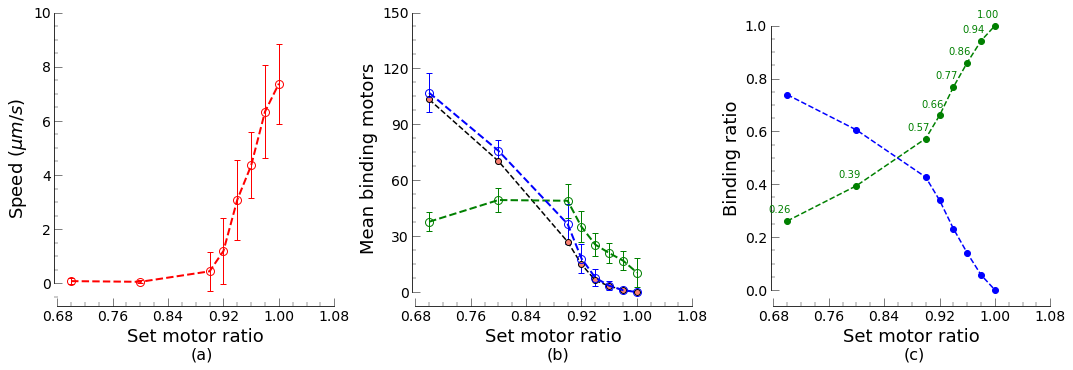

In [57]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].errorbar(r,s['spd'],s['std'], capsize=3, linestyle='--', lw=2, color = 'red', mec = 'red', marker='o',\
             markersize=8, markerfacecolor='none', ecolor='red', elinewidth=1, label='v11a')

#ax[0].fill_between(r,(s['spd']-s['std']),(s['spd']+s['std']), alpha=0.4, edgecolor='black', facecolor='#FF9848')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position(('axes',-0.01))
ax[0].spines['left'].set_position(('axes',-0.01))
ax[0].spines['left'].set_bounds(0,10)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[0].set_yticks(np.arange(0,10.3,2.0))

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Set motor ratio', fontsize=18)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize= 18)
#ax.legend(loc='upper left')
#ax.set_title('V11A')
#ax.set_aspect('equal')
# zip joins x and y coordinates in pairs


#for x,y in zip(r,s['spd']):
#    label = "{:.1f}".format(y)
#    ax[0].annotate(label,(x,y),textcoords="offset points",xytext=(5,7),ha='right', color='blue')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples


ax[1].errorbar(r,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax[1].errorbar(r,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
ax[1].plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='black', label='Def. F/k') # gray
#ax[1].plot(r,acw2, marker='o', markerfacecolor='salmon', ls='--', color='magenta', label='Def. w = 0.006')

#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].spines['bottom'].set_position(('axes',-0.01))
ax[1].spines['left'].set_position(('axes',-0.01))
ax[1].spines['left'].set_bounds(0,150)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[1].set_yticks(np.arange(0,151,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[1].set_xlabel('Set motor ratio', fontsize=18)
ax[1].set_ylabel('Mean binding motors', fontsize=18)
#================================================================================
act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

ax[2].plot(r,act_r, marker='o', linestyle='--', color = 'green')
ax[2].plot(r,def_r, marker='o', linestyle='--', color = 'blue')

for x,y in zip(r,act_r):
    label = "{:.2f}".format(y)
    ax[2].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[2].spines['bottom'].set_position(('axes',-0.01))
ax[2].spines['left'].set_position(('axes',-0.01))
ax[2].spines['left'].set_bounds(0,1)

ax[2].xaxis.set_ticks_position('bottom')
ax[2].yaxis.set_ticks_position('left')

ax[2].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[2].set_yticks(np.arange(0,1.1,0.2))

ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[2].set_xlabel('Set motor ratio', fontsize=18)
ax[2].set_ylabel('Binding ratio', fontsize=18)

#ax[1].legend(loc='best')


# ax[2].plot(r,ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2']), linestyle='--', linewidth=2, color='green', marker='o', markerfacecolor='salmon', label='Active ratio')
# ax[2].plot(r,ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2']), linestyle='--', linewidth=2, color='blue', marker='o', markerfacecolor='salmon', label='Defective ratio')

# ax[2].plot([0,1],[0,1], color='gray', ls='--')
# ax[2].plot([0,1],[1,0], color='gray', ls='--')
# ax[2].plot([0,1],[0.5,0.5], color='gray', ls='--')
# ax[2].spines['right'].set_visible(False)
# ax[2].spines['top'].set_visible(False)

# ax[2].spines['bottom'].set_position(('axes',-0.01))
# ax[2].spines['left'].set_position(('axes',-0.01))
# ax[2].spines['left'].set_bounds(0,1.0)
# ax[2].spines['bottom'].set_bounds(0,1.0)

# ax[2].xaxis.set_ticks_position('bottom')
# ax[2].yaxis.set_ticks_position('left')

# ax[2].set_xticks(np.arange(0,1.1,step=0.2))
# ax[2].set_yticks(np.arange(0,1.1,0.2))

# ax[2].set_aspect('equal', adjustable='box')

# #ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
# ax[2].minorticks_on()
# ax[2].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
# ax[2].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

# ax[2].set_ylabel(r'$\frac{Active\ or\ Defective}{Total}$', fontsize=16)
#ax[2].legend(loc='best')

fig.text(0.19,-0.01,'(a)', ha='center', fontsize= 16)
fig.text(0.52,-0.01,'(b)', ha='center', fontsize= 16)
fig.text(0.85,-0.01,'(c)', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/speed_binding_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R01_09s5dt02.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

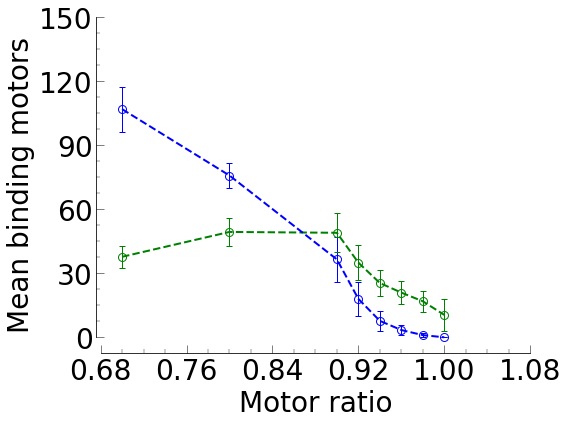

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.errorbar(r,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax.errorbar(r,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')
##ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax[1].plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='black', label='Def. F/k') # gray
##ax[1].plot(r,acw2, marker='o', markerfacecolor='salmon', ls='--', color='magenta', label='Def. w = 0.006')

#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,150)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.08))
ax.set_yticks(np.arange(0,151,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=28)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=28)

ax.set_xlabel('Motor ratio', fontsize=28)
ax.set_ylabel('Mean binding motors', fontsize=28)


fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/speed_binding_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R01_09s5dt02.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/binding_R01_09s5dt02.svg', format='svg', dpi=500, bbox_inches='tight')
plt.show()

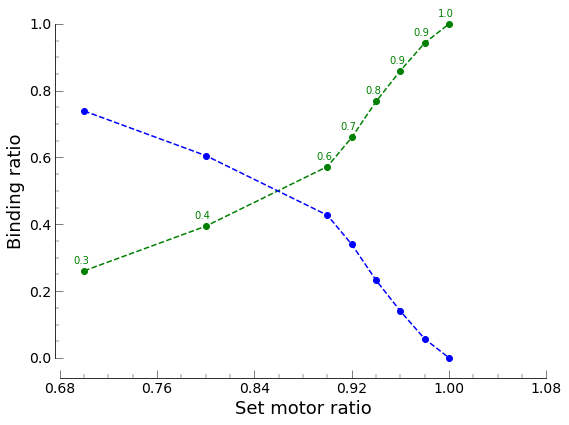

In [27]:
act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(r,act_r, marker='o', linestyle='--', color = 'green')
ax.plot(r,def_r, marker='o', linestyle='--', color = 'blue')

for x,y in zip(r,act_r):
    label = "{:.1f}".format(y)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(5,7),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,1)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.08))
ax.set_yticks(np.arange(0,1.1,0.2))

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Set motor ratio', fontsize=18)
ax.set_ylabel('Binding ratio', fontsize=18)


fig.tight_layout()

#ax.show()

$For\ actin\ filament\ made\ up\ of\ 2\ beads\ with\ 3\mu m\ rod\ bondlength:$ 

In [6]:
bm_es_def_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_def = []
bm_es_def_2 = []
bm_es_def2 = []
ratio = [0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0]

for i in range(8): # i -- motor ratio
    bm_def=(Fd / (Fd+((k*(s2['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w1
    bm_def2=(Fd / (Fd+((k*(s2['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w2
    bm_es_def_.append(bm_def)
    bm_es_def_2.append(bm_def2)
bm_es_def.append(bm_es_def_)
bm_es_def2.append(bm_es_def_2)
bm_es_def_ = []; bm_es_def_2 = []

dfw1 = np.array(bm_es_def); dfw1 = dfw1.flatten()
dfw2 = np.array(bm_es_def2); dfw2 = dfw2.flatten()

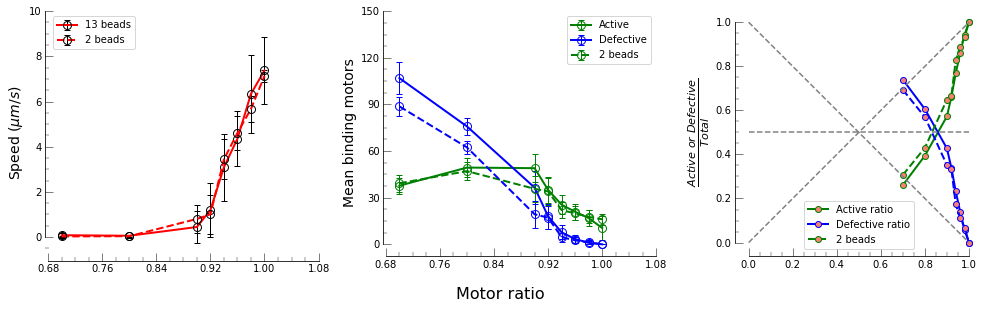

In [20]:
fig, ax = plt.subplots(1,3, figsize=(14,4))

ax[0].errorbar(r,s['spd'],s['std'], capsize=3, linestyle='-', lw=2, color = 'red', mec = 'black', marker='o',\
             markersize=8, markerfacecolor='none', ecolor='black', elinewidth=1, label='13 beads')

ax[0].errorbar(r,s2['spd'],s2['std'], capsize=3, linestyle='--', lw=2, color = 'red', mec = 'black', marker='o',\
             markersize=8, markerfacecolor='none', ecolor='black', elinewidth=1, label='2 beads')

#ax[0].fill_between(r,(s['spd']-s['std']),(s['spd']+s['std']), alpha=0.4, edgecolor='black', facecolor='#FF9848')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position(('axes',-0.03))
ax[0].spines['left'].set_position(('axes',-0.01))
ax[0].spines['left'].set_bounds(0,10)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[0].set_yticks(np.arange(0,10.3,2.0))

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')
ax[0].legend()

#ax[0].set_xlabel('Motor ratio', fontsize=18)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize= 14)
#ax.legend(loc='upper left')
#ax.set_title('V11A')
#ax.set_aspect('equal')
# zip joins x and y coordinates in pairs


#for x,y in zip(r,s2['spd']):
#    label = "{:.1f}".format(y)
#    ax[0].annotate(label,(x,y),textcoords="offset points",xytext=(5,7),ha='right', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples


ax[1].errorbar(r,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='-', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax[1].errorbar(r,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='-', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')
        
    
ax[1].errorbar(r,ac_def2['spec1'],ac_def2['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='2 beads')
ax[1].errorbar(r,ac_def2['spec2'],ac_def2['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax[1].plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='gray', label='Def. F/k')
#ax[1].plot(r,dfw2, marker='o', markerfacecolor='salmon', ls='--', color='brown', label='Def. W')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].spines['bottom'].set_position(('axes',-0.01))
ax[1].spines['left'].set_position(('axes',-0.01))
ax[1].spines['left'].set_bounds(0,150)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[1].set_yticks(np.arange(0,151,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

#ax[1].set_xlabel('Motor ratio')  # , fontsize=18
ax[1].set_ylabel('Mean binding motors', fontsize=14)
ax[1].legend(loc='best')


ax[2].plot(r,ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2']), linestyle='-', linewidth=2, color='green', marker='o', markerfacecolor='salmon', label='Active ratio')
ax[2].plot(r,ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2']), linestyle='-', linewidth=2, color='blue', marker='o', markerfacecolor='salmon', label='Defective ratio')

ax[2].plot(r,ac_def2['spec1']/(ac_def2['spec1'] + ac_def2['spec2']), linestyle='--', linewidth=2, color='green', marker='o', markerfacecolor='salmon', label='2 beads')
ax[2].plot(r,ac_def2['spec2']/(ac_def2['spec1'] + ac_def2['spec2']), linestyle='--', linewidth=2, color='blue', marker='o', markerfacecolor='salmon')


ax[2].plot([0,1],[0,1], color='gray', ls='--')
ax[2].plot([0,1],[1,0], color='gray', ls='--')
ax[2].plot([0,1],[0.5,0.5], color='gray', ls='--')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[2].spines['bottom'].set_position(('axes',-0.01))
ax[2].spines['left'].set_position(('axes',-0.01))
ax[2].spines['left'].set_bounds(0,1.0)
ax[2].spines['bottom'].set_bounds(0,1.0)

ax[2].xaxis.set_ticks_position('bottom')
ax[2].yaxis.set_ticks_position('left')

ax[2].set_xticks(np.arange(0,1.1,step=0.2))
ax[2].set_yticks(np.arange(0,1.1,0.2))

ax[2].set_aspect('equal', adjustable='box')

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[2].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

ax[2].set_ylabel(r'$\frac{Active\ or\ Defective}{Total}$', fontsize=16)
ax[2].legend(loc='best')


fig.text(0.5,-0.05,'Motor ratio', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/allRigid_speed_binding_R01_09s5dt02.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

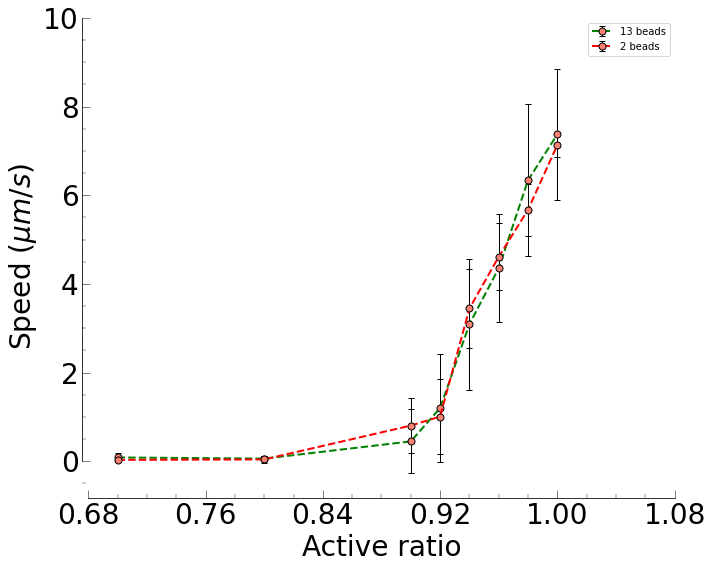

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.errorbar(r,s['spd'],s['std'], capsize=3, linestyle='--', lw=2, color = 'green', mec = 'black', marker='o',\
             markersize=7, markerfacecolor='salmon', ecolor='black', elinewidth=1, label='13 beads')
ax.errorbar(r,s2['spd'],s2['std'], capsize=3, linestyle='--', lw=2, color = 'red', mec = 'black', marker='o',\
             markersize=7, markerfacecolor='salmon', ecolor='black', elinewidth=1, label='2 beads')

#ax[0].fill_between(r,(s['spd']-s['std']),(s['spd']+s['std']), alpha=0.4, edgecolor='black', facecolor='#FF9848')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,10)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.08))
ax.set_yticks(np.arange(0,10.3,2.0))

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=28)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=28)

ax.set_xlabel('Active ratio', fontsize=28)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=28)

ax.legend()


fig.tight_layout()

#plt.savefig('fig/speed_R01_098s5dt01_.svg', format='svg', dpi=500, bbox_inches='tight')
plt.show()

In [63]:
!jupyter nbconvert V11nBMotors_Speed_dt1s5.ipynb --no-input --to html

[NbConvertApp] Converting notebook V11nBMotors_Speed_dt1s5.ipynb to html
[NbConvertApp] Writing 764161 bytes to V11nBMotors_Speed_dt1s5.html
